### Regression Problem

In [1]:
# imorting necessary libraries
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the boston_housing dataset in Keras and split data into train and test
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

# featurewise normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

(404, 13)
(102, 13)


In [3]:
#  network architecture
def build_model():
    # Sequential class used only for linear stacks of layers
    # functional API used for directed acyclic graphs of layers
    model = models.Sequential()
    # fully connected layer with 64 filters
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    # fully connected layer with 64 filters
    model.add(layers.Dense(64, activation='relu'))
    # fully connected layer with 1 output classes - no activation layer - it will be a linear layer
    model.add(layers.Dense(1))
    
    # compilation step
    # binary crossentropy for a two-class classification problem
    # categorical crossentropy for a many-class classification problem
    # meansquared error for a regression problem
    # connectionist temporal classification for a sequence-learning problem
    # mean squared error - the square of the difference between the predictions and the targets
    # mean absolute error - absolute value of the difference between the predictions and the targets
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [4]:
# Validating the approach using K-fold validation
# # Saving the validation logs at each fold
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


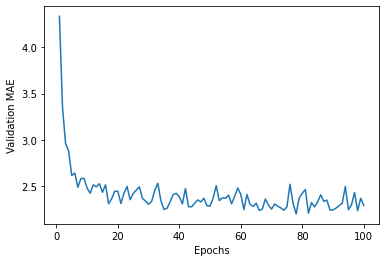

In [5]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

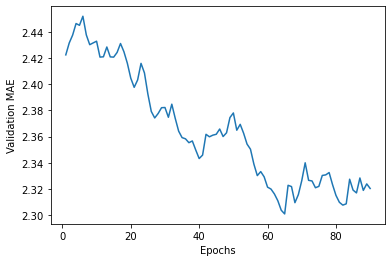

In [6]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [7]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.1134 - mae: 2.5086


In [8]:
test_mae_score

2.508608341217041